In [10]:
# importing libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading data

df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [8]:
# removing first column
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


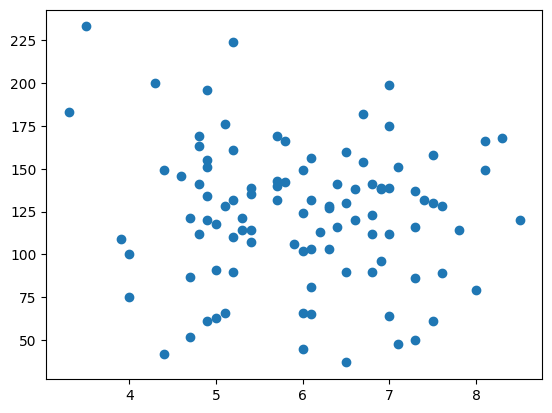

In [11]:
# creating a scatter plot

plt.scatter(df['cgpa'], df['iq'])

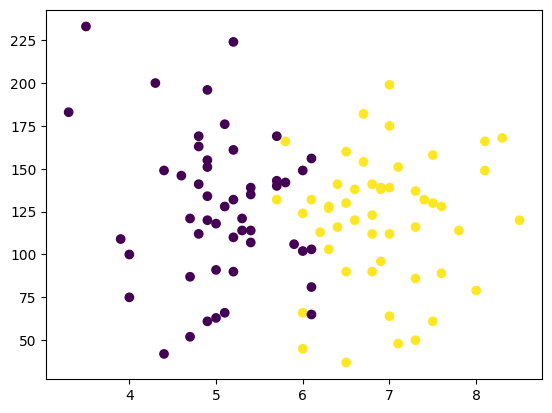

In [13]:
# ploting with placements

plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [14]:
# creating input and output variable

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [16]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [17]:
# importing train test split function

from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [20]:
X_train

,cgpa,iq
66,6.9,96.0
24,4.7,121.0
94,4.7,52.0
71,6.1,132.0
15,5.1,176.0
...,...,...
1,5.9,106.0
57,6.5,130.0
74,6.7,154.0
23,4.7,87.0


In [21]:
X_test

,cgpa,iq
54,6.4,141.0
37,8.1,149.0
38,6.5,160.0
55,7.8,114.0
80,4.9,196.0
97,6.7,182.0
0,6.8,123.0
25,5.0,91.0
95,4.3,200.0
8,6.1,156.0


In [22]:
y_train

,placement
66,1
24,0
94,0
71,1
15,0
...,...
1,0
57,1
74,1
23,0


In [23]:
y_test

,placement
54,1
37,1
38,1
55,1
80,0
97,1
0,1
25,0
95,0
8,0


In [24]:
# feature scaling

from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[ 0.83039515, -0.62565704],
       [-1.11538283,  0.01247911],
       [-1.11538283, -1.74877666],
       [ 0.12283952,  0.29325901],
       [-0.76160502,  1.41637863],
       [-2.17671628,  2.87132904],
       [ 0.12283952, -1.00853873],
       [-0.85004947, -1.46799675],
       [ 0.56506179,  0.44641169],
       [ 0.74195069,  0.52298802],
       [-0.93849392,  0.3443099 ],
       [ 1.36106187,  0.9569206 ],
       [ 1.44950632,  0.19115723],
       [-1.02693838,  1.08454783],
       [ 0.03439507,  0.72719159],
       [-0.85004947, -0.06409723],
       [-0.93849392,  0.77824248],
       [-0.14249384,  0.54851347],
       [ 0.83039515,  0.44641169],
       [ 0.03439507,  0.08905544],
       [ 1.18417296, -0.11514812],
       [-1.38071619, -2.00403111],
       [ 0.12283952, -1.41694586],
       [ 0.03439507, -1.92745478],
       [-0.49627166, -0.16619901],
       [ 0.74195069, -0.21724991],
       [ 1.18417296,  0.42088624],
       [ 0.03439507, -1.39142041],
       [-0.49627166,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[ 0.38817288,  0.52298802],
       [ 1.89172859,  0.72719159],
       [ 0.47661733,  1.00797149],
       [ 1.62639523, -0.16619901],
       [-0.93849392,  1.92688754],
       [ 0.65350624,  1.5695313 ],
       [ 0.74195069,  0.06353   ],
       [-0.85004947, -0.75328427],
       [-1.46916065,  2.02898933],
       [ 0.12283952,  0.90586971]])

In [30]:
# importing logistic Regresion model

from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [33]:
# model train

clf.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = clf.predict(X_test)

In [36]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [35]:
y_test

,placement
54,1
37,1
38,1
55,1
80,0
97,1
0,1
25,0
95,0
8,0


In [37]:
# checking accuracy of model

from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

0.9

We are getting 90% accuracy here.

In [40]:
# ploting decision boundaries

from mlxtend.plotting import plot_decision_regions

While giving training data to decision boundaries, you data must be in numpy array.

<Axes: >

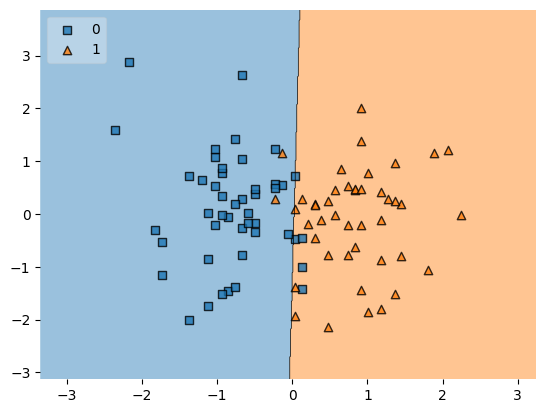

In [42]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [43]:
import pickle

In [44]:
pickle.dump(clf, open('model.pkl', 'wb'))